# lab02 simple linear regression

## 아래의 독립변수와 종속변수 데이터로 linear hypothesis를 만드시오
hypothesis

In [30]:
import tensorflow as tf

# data
x_data = [1,2,3,4,5]
y_data = [1,2,3,4,5]

# weight 2.1
##############################
W = tf.Variable(2.1)
##############################
print(W)


# bias 2.5
##############################
b = tf.Variable(2.5)
##############################
print(b)

# hypothesis
##############################
hypothesis = W * x_data + b
##############################
hypothesis

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.1>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.5>


<tf.Tensor: id=1386, shape=(5,), dtype=float32, numpy=
array([ 4.6     ,  6.7     ,  8.799999, 10.9     , 13.      ],
      dtype=float32)>

## linear regression의 cost 함수를 만드시오
cost

In [31]:
import tensorflow as tf

# cost
##############################
cost = tf.reduce_mean(tf.square(hypothesis - y_data))
##############################
cost

<tf.Tensor: id=1393, shape=(), dtype=float32, numpy=36.059998>

## gradient descent 1 epoch를 실행하시오
현재 기울기, gradient descent 1 epoch 실행후 기울기

In [32]:
tf.random.set_seed(7)
x_data = [1,2,3,4,5]
y_data = [1,2,3,4,5]
W = tf.Variable(2.1)
b = tf.Variable(2.5)

# learning rate 0.01
learning_rate = 0.01

# gradient descent 1 epoch
## GradientTape
##############################
with tf.GradientTape() as tape :
    hypothesis = W * x_data + b
    cost = tf.reduce_mean(tf.square(hypothesis - y_data))
##############################

## print current gradient
##############################
W_grad, b_grad = tape.gradient(cost, [W, b])
print(W_grad.numpy(), b_grad.numpy())
##############################


## update gradient
##############################
W.assign_sub(learning_rate * W_grad)
b.assign_sub(learning_rate * b_grad)
##############################


## print updated gradient
##############################
print(W.numpy(), b.numpy())
##############################

39.199997 11.599999
1.708 2.384


## tf.GradientTape()로 y = x ^ 2에서 x = 3일 때의 기울기를 구하시오
기울기

In [ ]:
# 상수 x
x = tf.constant(3.0)

# GradientTape()
#######################################
with tf.GradientTape() as g :
    g.watch(x)
    y = x*x
#######################################

# x = 3일 때 gradient 출력
#######################################
dy_dx = g.gradient(y,x)
dy_dx
#######################################

## gradient descent alorithm으로 파라미터를 101번 업데이트 하시오
100번째 업데이트 후의 W, b 값과 cost 값 출력

In [34]:
W = tf.Variable(2.1)
b = tf.Variable(2.5)

# learning rate 0.01
learning_rate = 0.01

# 반복
for i in range(100+1):
    # GradientTape
    #######################################
    with tf.GradientTape() as tape :
        hypothesis = W * x_data + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    #######################################
    
    # 현재 기울기
    #######################################
    W_grad, b_grad = tape.gradient(cost, [W, b])
    #######################################
    
    # 업데이트 후 기울기
    #######################################
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    #######################################
    
    # 100번 업데이트 후 W, b, cost 출력
    #######################################
    if i % 10 == 0 :
        print(f'{i:5}|{W.numpy():10.4}|{b.numpy():10.4}|{cost:10.6f}')
    #######################################

    0|     1.708|     2.384| 36.059998
   10|    0.5413|     1.988|  0.866565
   20|    0.4798|     1.901|  0.661519
   30|    0.4919|     1.836|  0.617526
   40|    0.5085|     1.775|  0.577081
   50|    0.5248|     1.715|  0.539287
   60|    0.5407|     1.658|  0.503969
   70|     0.556|     1.603|  0.470964
   80|    0.5707|      1.55|  0.440120
   90|     0.585|     1.498|  0.411296
  100|    0.5989|     1.448|  0.384360


# lab03 how to minimize cost

## cost function을 tensorflow 사용하지 않고 짜기(numpy 가능)
hypothesis는 H(X) = W * X라고 가정하고, 아래 제시한 weight에 대해서 cost function의 값을 출력하시오

In [ ]:
import numpy as np

X = np.array([1,2,3])
Y = np.array([1,2,3])

# cost funtion 정의
def cost_func(W, X, Y) :
    #######################################
    hypothesis = W * X
    c = sum((hypothesis - Y) ** 2)
    c /= len(X)
    return c
    #######################################

# 아래 제시한 w값에 대해 cost function 값 출력
for feed_W in np.linspace(-3, 5, num = 15) :
    #######################################
    print(f'W : {feed_W:5.2f} | cost : {cost_func(feed_W, X, Y):5.2f}')
    #######################################

## cost function을 tensorflow로 짜기
hypothesis는 H(X) = W * X라고 가정하고, 아래 제시한 weight에 대해서 cost function의 값을 출력하시오

In [ ]:
import tensorflow as tf

X = np.array([1,2,3])
Y = np.array([1,2,3])

# cost function 정의(tensorflow 사용)
def cost_func(W, X, Y) :
    #######################################
    hypothesis = W * X
    return tf.reduce_mean(tf.square(hypothesis - Y))
    #######################################
    
W_values = np.linspace(-3, 5, num=15)

for feed_W in W_values :
    print(f'W : {feed_W:5.2f} | cost : {cost_func(feed_W, X, Y):5.2f}')

## cost function이 아래와 같을 때 GradientTape 없이(그외 tensorflow code 사용가능) gradient descent를 구현하시오
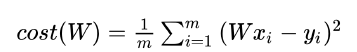
매 10회마다 w, cost 출력

In [ ]:
tf.random.set_seed(0)

X = np.array([1,2,3])
Y = np.array([1,2,3])

W = tf.Variable(tf.random.normal([1], -100., 100.))

# 300회 gradient descent(update)
for i in range(300) :
    
    hypothesis = W * X
    cost = tf.reduce_mean(tf.square(hypothesis - Y))
    
    # 현재 gradient
    #######################################
    learning_rate = 0.01
    gradient = tf.reduce_mean((W * X - Y) * X )
    #######################################
    
    # gradient update
    #######################################
    descent = W - learning_rate * gradient
    W.assign(descent)
    #######################################
    
    # 매 10회마다 출력
    if i % 10 == 0 :
        print(f'i : {i:5} | W : {W.numpy()[0]:5.2f} | cost : {cost:5.2f}')

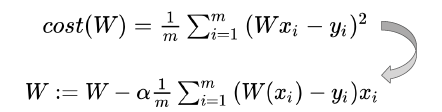
엄밀히 말해서는 cost function 분모에 2를 곱해야하지만..

# lab04 multi-variable linear regression(matrix!!!!!!!!!!!!!)

## 아래와 같이 데이터가 주어졌을 때 tensorflow의 matrix 연산으로 hypothesis와 cost function을 계산하는 식을 완전하라.

In [ ]:
tf.random.set_seed(0)

data = np.array([
    [73, 80, 75, 152],
    [93, 88, 93, 185],
    [89, 91, 90, 180],
    [96, 98, 100, 196],
    [73, 66, 70, 142]],
    dtype = np.float32)

X = data[:, :-1]
Y = data[:, [-1]]

# W, b 에 tensorflow 변수 객체 할당
#######################################
W = tf.Variable(tf.random.normal([3, 1]))
b = tf.Variable(tf.random.normal([1]))
#######################################

n_epochs = 2000
for i in range(n_epochs+1) :
    with tf.GradientTape() as tape :
        # hypothesis, cost
        ##################################### 채우시오
        hypothesis = tf.matmul(X, W) + b ################## shape이 (5,3) (3,1) 이어도 단순 * 은 안됨
        cost = tf.reduce_mean(tf.square(hypothesis - Y))
        #####################################
        
    W_grad, b_grad = tape.gradient(cost, [W,b])
    
    learning_rate = 0.00001
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    
    if i % 200 == 0 :
        print(f'i : {i} | cost : {cost.numpy()}')

# lab 05 logistic regression

## logictic regression 구현에서 빈칸을 채우세요..^^;

In [37]:
# seed 설정
tf.random.set_seed(0)

# 훈련/테스트 데이터
x_train = [[1., 2.],
          [2., 3.],
          [3., 1.],
          [4., 3.],
          [5., 3.],
          [6., 2.]]
y_train = [[0.],
          [0.],
          [0.],
          [1.],
          [1.],
          [1.]]

x_test = [[5.,2.]]
y_test = [[1.]]

# batch size(한번에 학습시킬 양) 설정
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))

# tensorflow Variable 설정
W = tf.Variable(tf.zeros([2,1]), name='weight')
b = tf.Variable(tf.zeros([1]), name='bias')

# 가설 설정 함수
def logistic_regression(features):
    ##############################################
    hypothesis  = tf.divide(1., 1. + tf.exp(tf.matmul(features, W) + b))
    ##############################################
    return hypothesis

# cost/loss function 함수
def loss_fn(features, labels):
    ##############################################
    cost = -tf.reduce_mean(labels * tf.math.log(logistic_regression(features)) + (1 - labels) * tf.math.log(1 - logistic_regression(features)))
    ##############################################
    return cost

# cost function에서 gradient 구하는 함수
def grad(features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(features,labels)
    ##############################################
    return tape.gradient(loss_value, [W,b])
    ##############################################

# optimizer : SGD
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01) ###################
EPOCHS = 1001

for step in range(EPOCHS):
    for features, labels  in iter(dataset):
        grads = grad(features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b])) ##########################
        if step % 100 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(features,labels)))
            
# accuracy 구하는 함수
def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)  ############
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.int32))
    return accuracy            

# 학습 완료 후 accuracy를 구하시오
test_acc = accuracy_fn(logistic_regression(x_test),y_test)
print("Testset Accuracy: {:.4f}".format(test_acc))

<tf.Variable 'weight:0' shape=(2, 1) dtype=float32, numpy=
array([[0.],
       [0.]], dtype=float32)>
Iter: 0, Loss: 0.6874
Iter: 100, Loss: 0.5776
Iter: 200, Loss: 0.5349
Iter: 300, Loss: 0.5054
Iter: 400, Loss: 0.4838
Iter: 500, Loss: 0.4671
Iter: 600, Loss: 0.4535
Iter: 700, Loss: 0.4420
Iter: 800, Loss: 0.4319
Iter: 900, Loss: 0.4228
Iter: 1000, Loss: 0.4144
Testset Accuracy: 1.0000
